Text(0.5, 1.0, 'X')

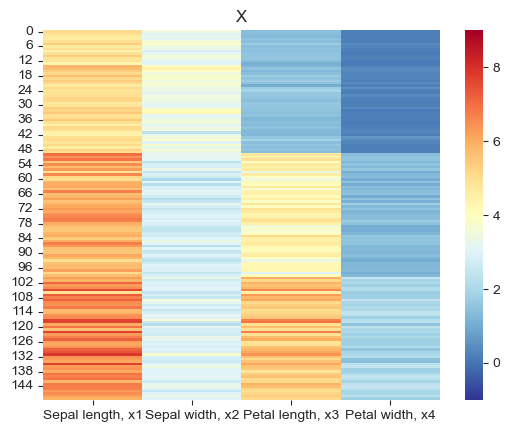

In [2]:
# Bk4_Ch22_01_A

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris data
iris_sns = sns.load_dataset("iris")
# A copy from Seaborn
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, x1', 'Sepal width, x2',
                 'Petal length, x3', 'Petal width, x4']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

plt.close('all')
# 设置坐标轴刻度线的样式
sns.set_style("ticks")

X = X_df.to_numpy();

# Visualize the heatmap of X

fig, ax = plt.subplots()
ax = sns.heatmap(X,
                 cmap='RdYlBu_r',
                 xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=9)
plt.title('X')


681.3706


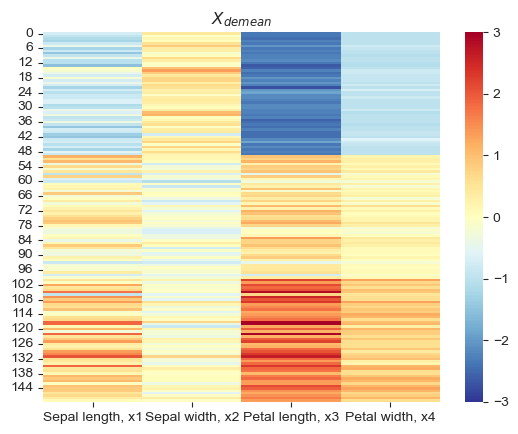

In [6]:
# Bk4_Ch22_01_B

v_1 = np.ones((len(X), 1))

E_X = v_1.T @ X / len(X)
# validate: X.mean(axis = 0)
# 减去相应列的均值
X_demean = X_df.sub(X_df.mean())

fig, ax = plt.subplots()
ax = sns.heatmap(X_demean,
                 cmap='RdYlBu_r',
                 xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-3, vmax=3)
plt.title('$X_{demean}$')

SSD = (np.linalg.norm(X - E_X, axis=1) ** 2).sum()
print(SSD)
# validate: ((X - E_X)**2).sum()
# use trace: np.trace((X - E_X).T@(X - E_X))


Text(0.5, 1.0, 'Distribution of $X_{demean}$ columns')

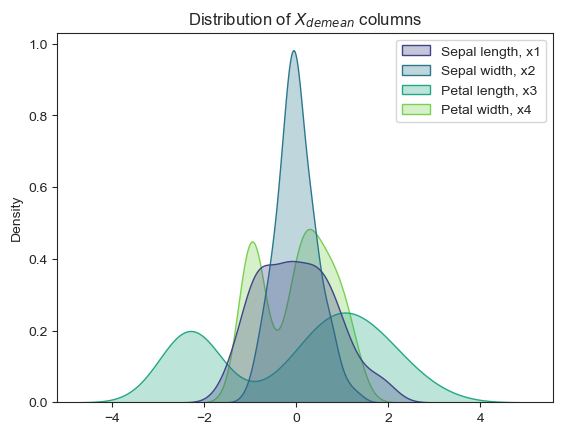

In [4]:
# Bk4_Ch22_01_C

# distribution of column features of X

fig, ax = plt.subplots()
# 绘制核密度估计图
sns.kdeplot(data=X_demean, fill=True,
            common_norm=False,
            alpha=.3, linewidth=1,
            palette="viridis")
plt.title('Distribution of $X_{demean}$ columns')


Text(0.5, 1.0, 'Y = 2, virginica')

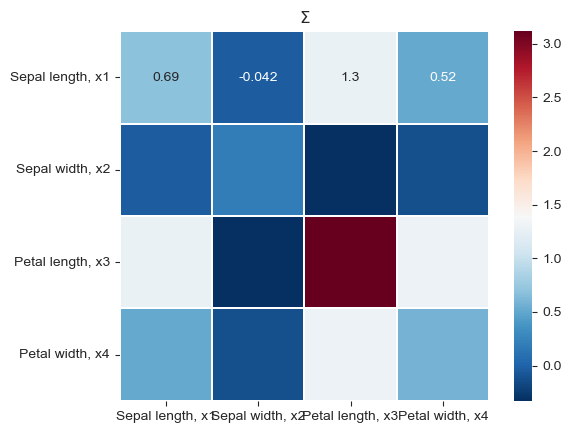

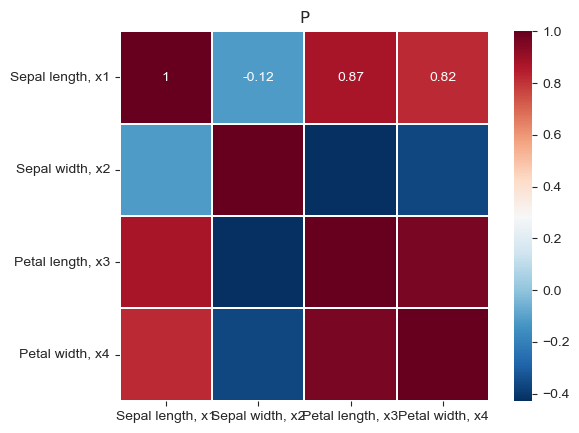

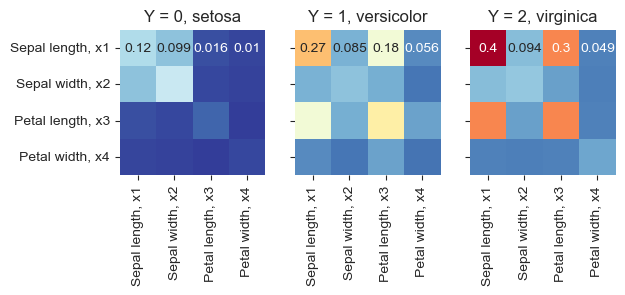

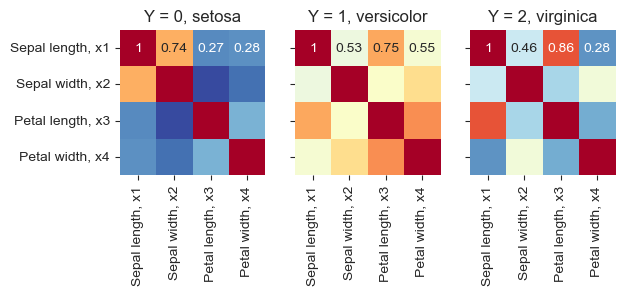

In [5]:
# Bk4_Ch22_01_D

# 计算协方差矩阵
SIGMA = X_df.cov()

fig, axs = plt.subplots()

h = sns.heatmap(SIGMA, cmap='RdBu_r', linewidths=.05, annot=True)
h.set_aspect("equal")
h.set_title('$\Sigma$')

# 计算相关矩阵
RHO = X_df.corr()

fig, axs = plt.subplots()

h = sns.heatmap(RHO, cmap='RdBu_r', linewidths=.05, annot=True)
h.set_aspect("equal")
h.set_title('$\u03A1$')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(X_df[y == 0].cov(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=0.4, vmin=0)
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(X_df[y == 1].cov(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=0.4, vmin=0)
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(X_df[y == 2].cov(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=0.4, vmin=0)
ax3.set_title('Y = 2, virginica')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(X_df[y == 0].corr(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=1, vmin=0.15)
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(X_df[y == 1].corr(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=1, vmin=0.15)
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(X_df[y == 2].corr(), cmap="RdYlBu_r",
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=1, vmin=0.15)
ax3.set_title('Y = 2, virginica')